In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
train=pd.read_csv("C:/Users/Avinash/Downloads/New folder (3)/train_u5jK80M/train.csv")
test=pd.read_csv("C:/Users/Avinash/Downloads/New folder (3)/test_3BA6GZX/test.csv")
sub=pd.read_csv("C:/Users/Avinash/Downloads/New folder (3)/sample_submission_1Sfyqeb/sample_submission.csv")

In [131]:
train['m13'].value_counts()

0    115422
1       636
Name: m13, dtype: int64

In [132]:
test.shape

(35866, 28)

In [133]:
test['financial_institution'].value_counts()

OTHER                          15162
Browning-Hart                  10078
Swanson, Newton and Miller      2095
Edwards-Hoffman                 1530
Martinez, Duffy and Bird        1448
Miller, Mcclure and Allen        912
Nicholson Group                  596
Suarez Inc                       586
Turner, Baldwin and Rhodes       542
Cole, Brooks and Vincent         492
Richards-Walters                 462
Taylor, Hunt and Rodriguez       397
Sanchez-Robinson                 384
Sanchez, Hays and Wilkerson      289
Romero, Woods and Johnson        241
Thornton-Davis                   216
Richardson Ltd                   170
Anderson-Taylor                  152
Chapman-Mcmahon                  114
Name: financial_institution, dtype: int64

In [16]:
train.tail(15)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
116043,101989961963,X,OTHER,3.250,118000,180,2012-03-01,05/2012,42,2.0,...,0,0,0,0,0,0,0,0,0,0
116044,967378269093,X,Browning-Hart,4.500,55000,360,2012-02-01,04/2012,64,2.0,...,0,0,0,0,0,0,0,0,0,0
116045,403533707370,X,OTHER,2.875,194000,180,2012-03-01,05/2012,45,2.0,...,0,0,0,0,0,0,0,0,0,0
116046,325294420616,X,OTHER,3.875,176000,180,2012-01-01,03/2012,39,2.0,...,0,0,0,0,0,0,0,0,0,0
116047,956715092548,X,OTHER,3.625,110000,360,2012-02-01,04/2012,80,1.0,...,0,0,0,0,0,0,0,0,0,0
116048,536022970387,X,OTHER,3.000,90000,180,2012-03-01,05/2012,72,1.0,...,0,0,0,0,0,0,0,0,0,0
116049,745013346682,Y,OTHER,4.250,492000,360,2012-01-01,03/2012,66,1.0,...,0,0,0,0,0,0,0,0,0,0
116050,627135532331,X,Browning-Hart,3.875,288000,240,2012-01-01,03/2012,80,2.0,...,0,0,0,0,0,0,0,0,0,0
116051,374363980675,X,"Swanson, Newton and Miller",4.375,107000,360,2012-01-01,03/2012,70,1.0,...,0,0,0,0,0,0,0,0,0,0
116052,749843159666,X,OTHER,4.375,86000,360,2012-02-01,04/2012,75,1.0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
test.dtypes

loan_id                       int64
source                        int64
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date              int64
first_payment_date            int64
loan_to_value                 int64
number_of_borrowers           int64
debt_to_income_ratio          int64
borrower_credit_score         int64
loan_purpose                  int64
insurance_percent             int64
co-borrower_credit_score      int64
insurance_type                int64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                           int64
paymnet                     

In [67]:
#train=train.drop('financial_institution',axis=1)
#test=test.drop('financial_institution',axis=1)

In [134]:
def plot_crosstab(train,cols,col_y='m13'):
    for col in cols:
        df=pd.crosstab(train[col],train[col_y])
        df.div(df.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
        plt.show()

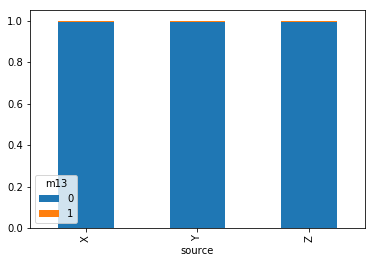

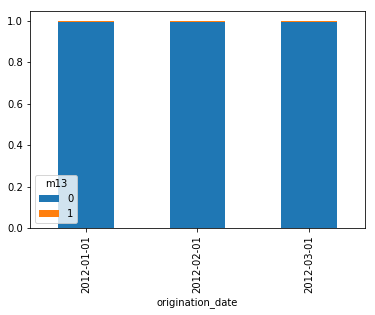

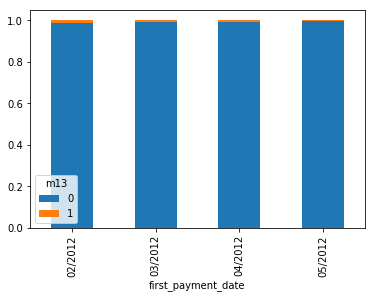

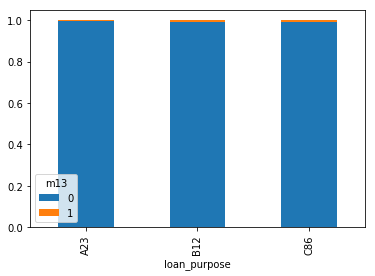

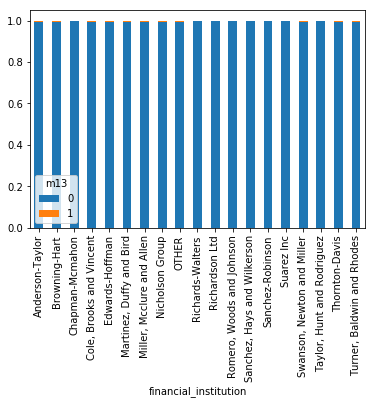

In [135]:
cols=['source','origination_date','first_payment_date','loan_purpose','financial_institution']
plot_crosstab(train,cols)

In [136]:
train.loc[train['financial_institution']=='OTHER','financial_institution']=1
train.loc[train['financial_institution']=='Browning-Hart','financial_institution']=2
train.loc[train['financial_institution']=='Swanson, Newton and Miller','financial_institution']=3
train.loc[train['financial_institution']=='Edwards-Hoffman','financial_institution']=4
train.loc[train['financial_institution']=='Martinez, Duffy and Bird','financial_institution']=5
train.loc[train['financial_institution']=='Miller, Mcclure and Allen','financial_institution']=6
train.loc[train['financial_institution']=='Nicholson Group','financial_institution']=7
train.loc[train['financial_institution']=='Turner, Baldwin and Rhodes','financial_institution']=8
train.loc[train['financial_institution']=='Suarez Inc','financial_institution']=9
train.loc[train['financial_institution']=='Cole, Brooks and Vincent','financial_institution']=10
train.loc[train['financial_institution']=='Richards-Walters','financial_institution']=11
train.loc[train['financial_institution']=='Taylor, Hunt and Rodriguez','financial_institution']=12
train.loc[train['financial_institution']=='Sanchez-Robinson','financial_institution']=13
train.loc[train['financial_institution']=='Sanchez, Hays and Wilkerson','financial_institution']=14
train.loc[train['financial_institution']=='Romero, Woods and Johnson','financial_institution']=15
train.loc[train['financial_institution']=='Thornton-Davis','financial_institution']=16
train.loc[train['financial_institution']=='Anderson-Taylor','financial_institution']=17
train.loc[train['financial_institution']=='Richardson Ltd','financial_institution']=18
train.loc[train['financial_institution']=='Chapman-Mcmahon','financial_institution']=19


In [137]:
test.loc[test['financial_institution']=='OTHER','financial_institution']=1
test.loc[test['financial_institution']=='Browning-Hart','financial_institution']=2
test.loc[test['financial_institution']=='Swanson, Newton and Miller','financial_institution']=3
test.loc[test['financial_institution']=='Edwards-Hoffman','financial_institution']=4
test.loc[test['financial_institution']=='Martinez, Duffy and Bird','financial_institution']=5
test.loc[test['financial_institution']=='Miller, Mcclure and Allen','financial_institution']=6
test.loc[test['financial_institution']=='Nicholson Group','financial_institution']=7
test.loc[test['financial_institution']=='Turner, Baldwin and Rhodes','financial_institution']=8
test.loc[test['financial_institution']=='Suarez Inc','financial_institution']=9
test.loc[test['financial_institution']=='Cole, Brooks and Vincent','financial_institution']=10
test.loc[test['financial_institution']=='Richards-Walters','financial_institution']=11
test.loc[test['financial_institution']=='Taylor, Hunt and Rodriguez','financial_institution']=12
test.loc[test['financial_institution']=='Sanchez-Robinson','financial_institution']=13
test.loc[test['financial_institution']=='Sanchez, Hays and Wilkerson','financial_institution']=14
test.loc[test['financial_institution']=='Romero, Woods and Johnson','financial_institution']=15
test.loc[test['financial_institution']=='Thornton-Davis','financial_institution']=16
test.loc[test['financial_institution']=='Anderson-Taylor','financial_institution']=17
test.loc[test['financial_institution']=='Richardson Ltd','financial_institution']=18
test.loc[test['financial_institution']=='Chapman-Mcmahon','financial_institution']=19

In [138]:
train.loc[train['source']=='X','source']=1
train.loc[train['source']=='Y','source']=2
train.loc[train['source']=='Z','source']=3
test.loc[test['source']=='X','source']=1
test.loc[test['source']=='Y','source']=2
test.loc[test['source']=='Z','source']=3

In [139]:
train.loc[train['origination_date']=='2012-01-01','origination_date']=1
train.loc[train['origination_date']=='2012-02-01','origination_date']=2
train.loc[train['origination_date']=='2012-03-01','origination_date']=3
test.loc[test['origination_date']=='01/01/12','origination_date']=1
test.loc[test['origination_date']=='01/02/12','origination_date']=2
test.loc[test['origination_date']=='01/03/12','origination_date']=3


In [140]:
train.loc[train['first_payment_date']=='05/2012','first_payment_date']=1
train.loc[train['first_payment_date']=='04/2012','first_payment_date']=2
train.loc[train['first_payment_date']=='03/2012','first_payment_date']=3
train.loc[train['first_payment_date']=='02/2012','first_payment_date']=4
test.loc[test['first_payment_date']=='Feb-12','first_payment_date']=1
test.loc[test['first_payment_date']=='Mar-12','first_payment_date']=2
test.loc[test['first_payment_date']=='Apr-12','first_payment_date']=3
test.loc[test['first_payment_date']=='May-12','first_payment_date']=4

In [144]:
train.loc[train['loan_purpose']=='A23','loan_purpose']=1
train.loc[train['loan_purpose']=='B12','loan_purpose']=2
train.loc[train['loan_purpose']=='C86','loan_purpose']=3
test.loc[test['loan_purpose']=='A23','loan_purpose']=1
test.loc[test['loan_purpose']=='B12','loan_purpose']=2
test.loc[test['loan_purpose']=='C86','loan_purpose']=3

In [145]:
train['paymnet']=train['m1']+train['m2']+train['m3']+train['m4']+train['m5']+train['m6']+train['m7']+train['m8']+train['m9']+train['m10']+train['m11']+train['m12']
test['paymnet']=test['m1']+test['m2']+test['m3']+test['m4']+test['m5']+test['m6']+test['m7']+test['m8']+test['m9']+test['m10']+test['m11']+test['m12']


In [146]:
train1=train.drop(['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12'],axis=1)
test1=test.drop(['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12'],axis=1)

In [147]:
from sklearn.linear_model import LogisticRegression,LinearRegression,BayesianRidge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [148]:
from sklearn.utils import resample
from imblearn import over_sampling

In [33]:
train_majority=train1[train.m13==0]
train_minority=train1[train.m13==1]


In [37]:
train1['m13'].value_counts()

0    115422
1    100000
Name: m13, dtype: int64

In [35]:
train_minority_upsampled=resample(train_minority,replace=True,n_samples=100000,random_state=123)

In [36]:
train1=pd.concat([train_majority,train_minority_upsampled])

In [38]:
train2=train1.drop('m13',axis=1)

In [149]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['m13'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, dtrain[predictors], dtrain['m13'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['m13'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['m13'], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.8404
AUC Score (Train): 0.920078
CV Score : Mean - 0.9198302 | Std - 0.001096537 | Min - 0.9186016 | Max - 0.9213568


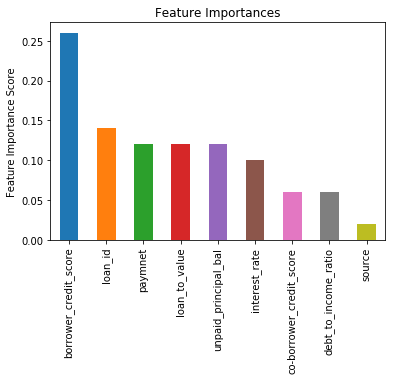

In [64]:
alg=AdaBoostClassifier()
predictors=[x for x in train2.columns]
modelfit(alg,train1,predictors)

In [52]:
train2=train1.drop(['loan_term','origination_date','first_payment_date','number_of_borrowers','loan_purpose','insurance_percent','insurance_type','m13'],axis=1)

In [53]:
test2=test1.drop(['loan_term','origination_date','first_payment_date','number_of_borrowers','loan_purpose','insurance_percent','insurance_type'],axis=1)

In [54]:
train2.shape

(215422, 9)

In [55]:
x_train,x_valid,y_train,y_valid=train_test_split(train2,train1['m13'],test_size=0.4)

In [57]:
alg=AdaBoostClassifier()
alg.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [58]:
prediction=alg.predict(x_valid)

In [59]:
f1_score(prediction,y_valid)

0.8093645484949833

In [60]:
predict=alg.predict(test2)

In [61]:
sub['m13']=predict

In [62]:
sub.head(2)

,loan_id,m13
0,1,0
1,2,0


In [63]:
sub['m13'].value_counts()

0    35528
1      338
Name: m13, dtype: int64

In [155]:
pd.DataFrame(sub, columns=['loan_id','m13']).to_csv('iml.csv',index=False)

In [150]:
x_train=train.drop('m13',axis=1)
y_train=train['m13']

In [151]:
x_train.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'paymnet'],
      dtype='object')

In [152]:
y_train.shape

(116058,)

In [153]:
sm=over_sampling.SMOTE(sampling_strategy='minority')

In [154]:
x_train_res,y_train_res=sm.fit_resample(x_train,y_train)

In [155]:
x_train_res.shape

(230844, 29)

In [156]:
g=pd.DataFrame({'loan_id':x_train_res[:,0],'source':x_train_res[:,1],'financial_institution':x_train_res[:,2],'interest_rate':x_train_res[:,3],'unpaid_principal_bal':x_train_res[:,4],'loan_term':x_train_res[:,5],'origination_date':x_train_res[:,6],'first_payment_date':x_train_res[:,7],'loan_to_value':x_train_res[:,8],'number_of_borrowers':x_train_res[:,9],'debt_to_income_ratio':x_train_res[:,10],'borrower_credit_score':x_train_res[:,11],'loan_purpose':x_train_res[:,12],'insurance_percent':x_train_res[:,13],'co-borrower_credit_score':x_train_res[:,14],'insurance_type':x_train_res[:,15],'m1':x_train_res[:,16],'m2':x_train_res[:,17],'m3':x_train_res[:,18],'m4':x_train_res[:,19],'m5':x_train_res[:,20],'m6':x_train_res[:,21],'m7':x_train_res[:,22],'m8':x_train_res[:,23],'m9':x_train_res[:,24],'m10':x_train_res[:,25],'m11':x_train_res[:,26],'m12':x_train_res[:,27],'payment':x_train_res[:,28]})

In [157]:
g1=pd.DataFrame(y_train_res)

In [158]:
train1=g
train1['m13']=g1

In [159]:
g=g.drop('m13',axis=1)

In [160]:
g.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'payment'],
      dtype='object')


Model Report
Accuracy : 0.9873
AUC Score (Train): 0.998829
CV Score : Mean - 0.9987357 | Std - 0.001320347 | Min - 0.9960986 | Max - 0.9994884


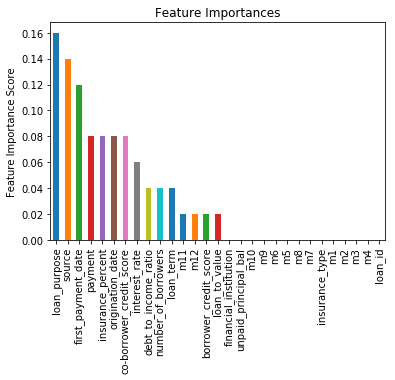

In [161]:
alg=AdaBoostClassifier()
predictors=[x for x in g.columns]
modelfit(alg,train1,predictors)

In [102]:
g=g.drop(['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12','loan_id','insurance_type'],axis=1)
test2=test.drop(['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12','loan_id','insurance_type'],axis=1)

In [103]:
g.shape

(230844, 14)

In [104]:
x_train,x_valid,y_train,y_valid=train_test_split(g,train1['m13'],test_size=0.4)

In [105]:
alg=AdaBoostClassifier()
alg.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [106]:
prediction=alg.predict(x_valid)

In [107]:
f1_score(prediction,y_valid)

0.9868273877395884

In [108]:
test.dtypes

loan_id                       int64
source                        int64
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date              int64
first_payment_date            int64
loan_to_value                 int64
number_of_borrowers           int64
debt_to_income_ratio          int64
borrower_credit_score         int64
loan_purpose                  int64
insurance_percent             int64
co-borrower_credit_score      int64
insurance_type                int64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                           int64
paymnet                     

In [109]:
predict=alg.predict(test2)

In [110]:
sub['m13']=predict

In [111]:
sub['m13'].value_counts()

0    35533
1      333
Name: m13, dtype: int64

In [112]:
pd.DataFrame(sub, columns=['loan_id','m13']).to_csv('iml_smote.csv',index=False)